
# 📊 M5.2 分布圖與密度圖

本課程專注於數據分布的視覺化技術，這是數據分析中的關鍵任務。了解數據的分布特徵對於理解數據特性、識別異常值、選擇適當的統計模型都至關重要。我們將探討多種分布圖表，包括直方圖、密度圖、箱型圖等，並學習如何解讀和定制這些圖表以獲取最大洞察。


## 🎯 教學目標

- 📈 掌握各類數據分布圖表的適用場景與實現方法
- 🔍 學習如何通過視覺化辨識不同類型的數據分布
- 🎨 探索分布圖的進階定制與美化技巧
- 💡 能夠結合多種分布圖表深入分析數據特性

In [26]:
# 環境設置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
import warnings
from matplotlib.ticker import PercentFormatter

# 忽略警告
warnings.filterwarnings('ignore')

# 設置中文字體 (如果系統支持)
try:
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'Arial Unicode MS']
    plt.rcParams['axes.unicode_minus'] = False
except:
    pass

# 設置顯示選項
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 120)

# 設置繪圖風格
plt.style.use('seaborn-v0_8-whitegrid')

# 設置隨機種子以確保結果可重現
np.random.seed(42)

In [27]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# # 設置可視化風格
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 微軟正黑體或思源黑體路徑 (請依你電腦為準)
font_path = "C:/Windows/Fonts/msjh.ttc"  # 或 simsun.ttc, NotoSansCJK, 等

# 建立 FontProperties
font_prop = fm.FontProperties(fname=font_path)

# 設定 matplotlib 全域字型（包括標題、座標軸、legend）
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 避免負號亂碼

# 設置顯示選項
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 100)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)


## 1. 直方圖 (Histogram)

直方圖是展示數據分布最基本也最常用的方法。它將數據分為若干個箱子(bins)，然後計算每個箱子中的數據頻率。直方圖可以幫助我們了解：

- 數據的集中趨勢（均值、中位數和眾數）
- 數據的分散程度（方差、標準差）
- 數據的偏態（偏左或偏右）
- 異常值的存在

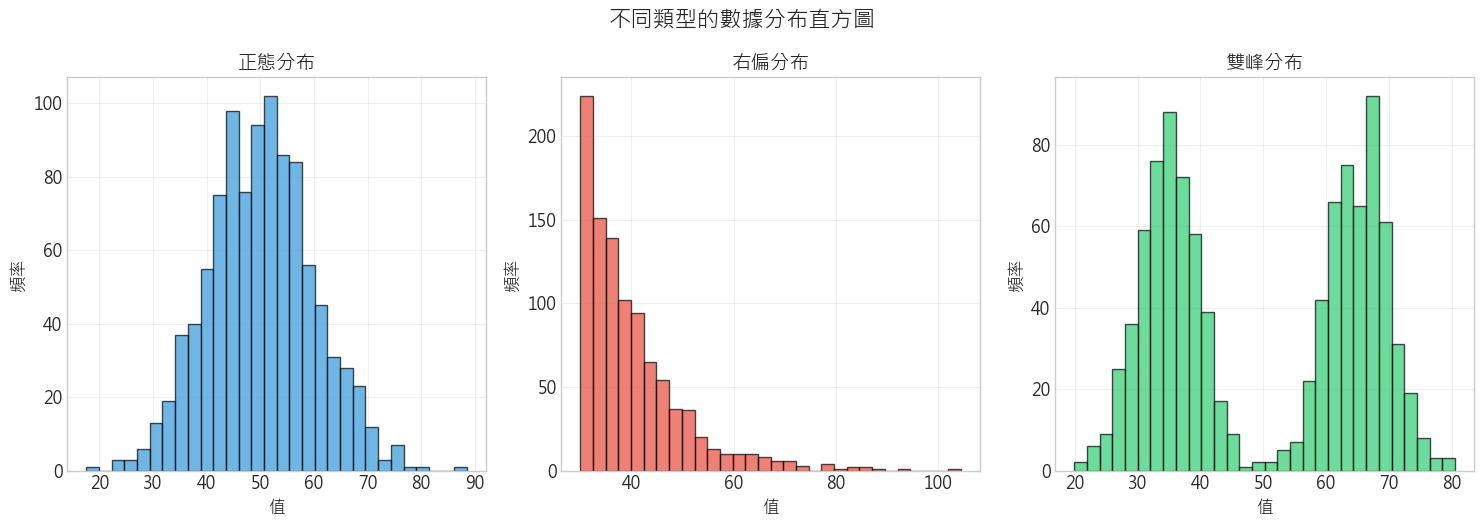

In [28]:
# 生成不同類型的隨機數據
# 創建三種不同的分布以進行比較
data_normal = np.random.normal(loc=50, scale=10, size=1000)  # 正態分布
data_skewed = np.random.exponential(scale=10, size=1000) + 30  # 右偏分布
data_bimodal = np.concatenate([
    np.random.normal(loc=35, scale=5, size=500),
    np.random.normal(loc=65, scale=5, size=500)
])  # 雙峰分布

# 繪製基本直方圖
plt.figure(figsize=(15, 5))

# 正態分布
plt.subplot(1, 3, 1)
plt.hist(data_normal, bins=30, color='#3498db', alpha=0.7, edgecolor='black')
plt.title('正態分布', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('頻率', fontsize=12)
plt.grid(True, alpha=0.3)

# 右偏分布
plt.subplot(1, 3, 2)
plt.hist(data_skewed, bins=30, color='#e74c3c', alpha=0.7, edgecolor='black')
plt.title('右偏分布', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('頻率', fontsize=12)
plt.grid(True, alpha=0.3)

# 雙峰分布
plt.subplot(1, 3, 3)
plt.hist(data_bimodal, bins=30, color='#2ecc71', alpha=0.7, edgecolor='black')
plt.title('雙峰分布', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('頻率', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('不同類型的數據分布直方圖', fontsize=16, y=1.05)
plt.show()


### 1.1 直方圖的進階定制

直方圖有許多定制選項，可以提升其信息傳達效果：
- 箱子數量(bins)的選擇
- 頻率與密度的表示
- 累積直方圖
- 與理論分布的比較

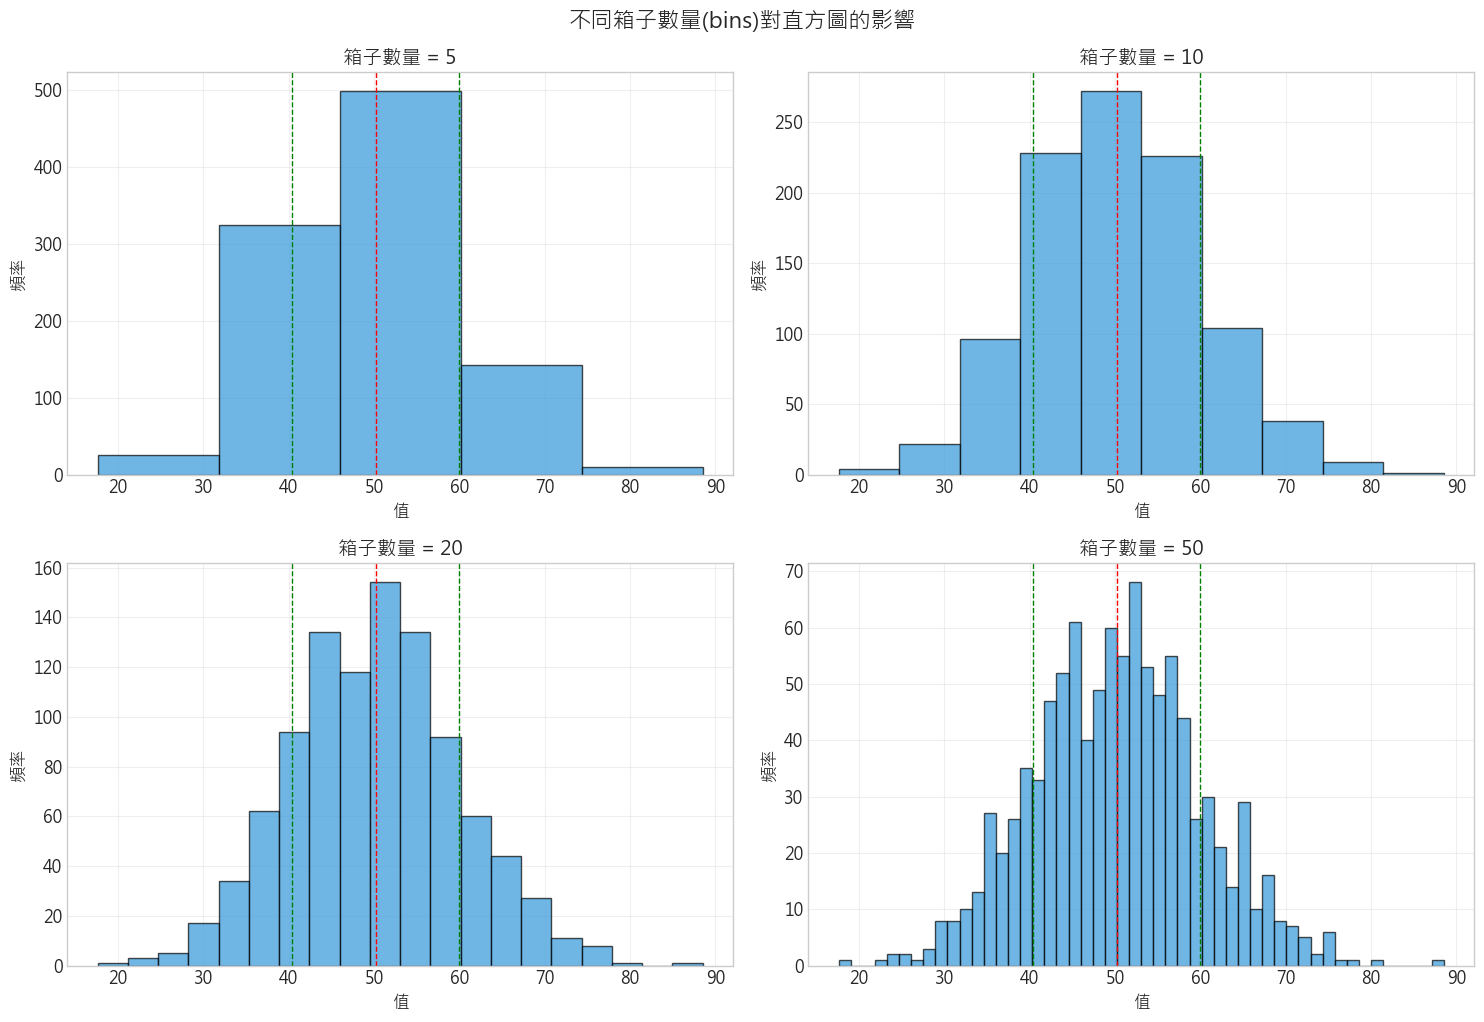

In [30]:
# 進階直方圖：不同bins數量的比較
plt.figure(figsize=(15, 10))

bin_sizes = [5, 10, 20, 50]
for i, bins in enumerate(bin_sizes, 1):
    plt.subplot(2, 2, i)
    plt.hist(data_normal, bins=bins, color='#3498db', alpha=0.7, edgecolor='black')
    plt.title(f'箱子數量 = {bins}', fontsize=14)
    plt.xlabel('值', fontsize=12)
    plt.ylabel('頻率', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # 添加均值和標準差線
    plt.axvline(data_normal.mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(data_normal.mean() + data_normal.std(), color='green', linestyle='dashed', linewidth=1)
    plt.axvline(data_normal.mean() - data_normal.std(), color='green', linestyle='dashed', linewidth=1)

plt.tight_layout()
plt.suptitle('不同箱子數量(bins)對直方圖的影響', fontsize=16, y=1.02)
plt.show()

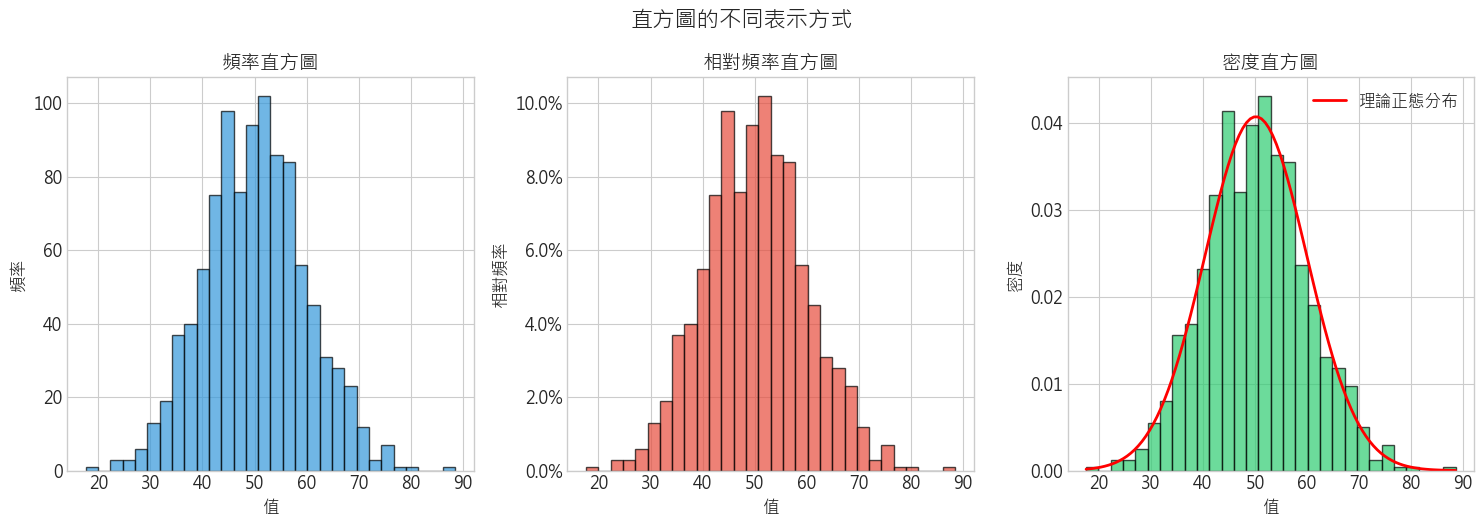

In [31]:
# 頻率與密度的比較
plt.figure(figsize=(15, 5))

# 頻率直方圖
plt.subplot(1, 3, 1)
plt.hist(data_normal, bins=30, color='#3498db', alpha=0.7, edgecolor='black')
plt.title('頻率直方圖', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('頻率', fontsize=12)

# 相對頻率直方圖
plt.subplot(1, 3, 2)
plt.hist(data_normal, bins=30, color='#e74c3c', alpha=0.7, edgecolor='black',
        weights=np.ones_like(data_normal) / len(data_normal))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('相對頻率直方圖', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('相對頻率', fontsize=12)

# 密度直方圖
plt.subplot(1, 3, 3)
plt.hist(data_normal, bins=30, color='#2ecc71', alpha=0.7, edgecolor='black', density=True)
plt.title('密度直方圖', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('密度', fontsize=12)

# 添加理論正態分布曲線
x = np.linspace(min(data_normal), max(data_normal), 100)
plt.plot(x, stats.norm.pdf(x, data_normal.mean(), data_normal.std()), 
        'r-', linewidth=2, label='理論正態分布')
plt.legend()

plt.tight_layout()
plt.suptitle('直方圖的不同表示方式', fontsize=16, y=1.05)
plt.show()

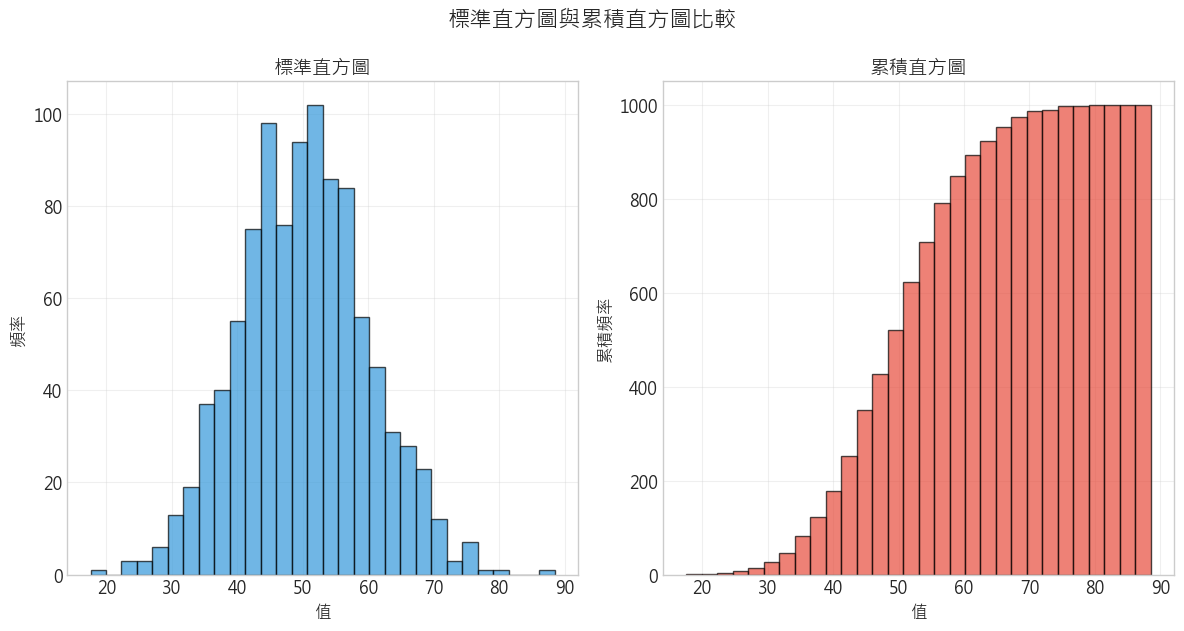

In [32]:
# 累積直方圖
plt.figure(figsize=(12, 6))

# 標準直方圖
plt.subplot(1, 2, 1)
plt.hist(data_normal, bins=30, color='#3498db', alpha=0.7, edgecolor='black')
plt.title('標準直方圖', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('頻率', fontsize=12)
plt.grid(True, alpha=0.3)

# 累積直方圖
plt.subplot(1, 2, 2)
plt.hist(data_normal, bins=30, color='#e74c3c', alpha=0.7, edgecolor='black', cumulative=True)
plt.title('累積直方圖', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('累積頻率', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('標準直方圖與累積直方圖比較', fontsize=16, y=1.05)
plt.show()


## 2. 核密度估計圖 (KDE Plot)

核密度估計圖是直方圖的平滑版本，它通過使用核函數對數據點進行加權，生成連續的密度曲線。KDE圖的優點是：

- 提供數據分布的平滑視圖，不受箱子寬度的影響
- 更容易看出分布的峰值和模態
- 有助於比較不同組的數據分布

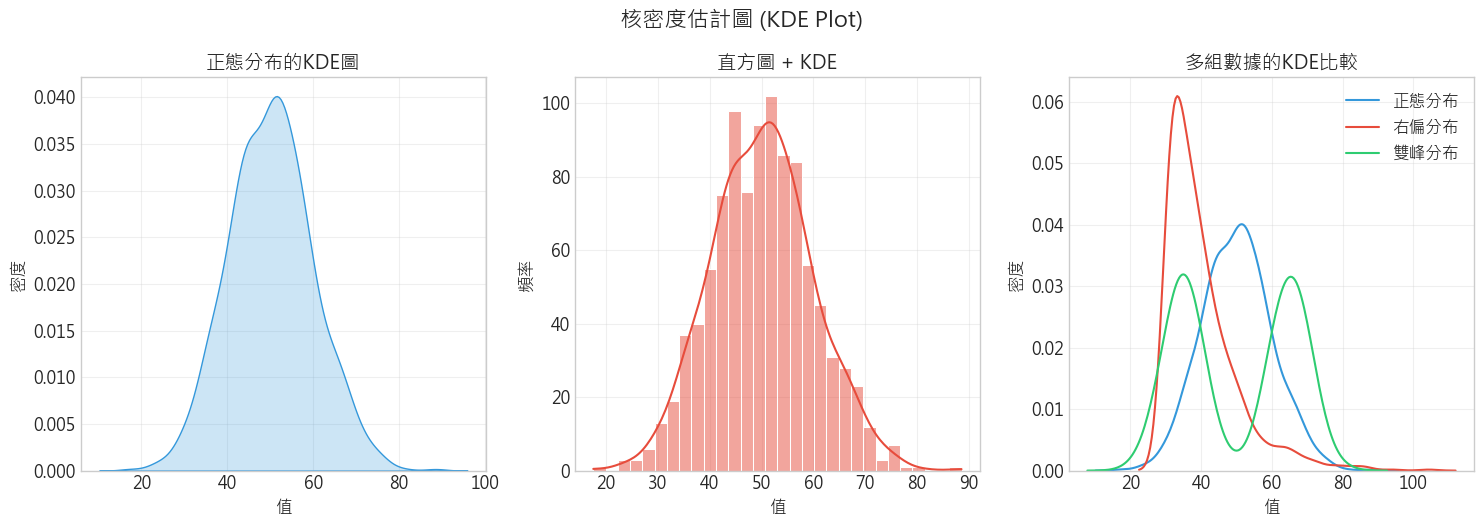

In [34]:
# 基本KDE圖
plt.figure(figsize=(15, 5))

# 單獨的KDE圖
plt.subplot(1, 3, 1)
sns.kdeplot(data_normal, color='#3498db', fill=True)
plt.title('正態分布的KDE圖', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('密度', fontsize=12)
plt.grid(True, alpha=0.3)

# 直方圖 + KDE圖
plt.subplot(1, 3, 2)
sns.histplot(data_normal, bins=30, kde=True, color='#e74c3c')
plt.title('直方圖 + KDE', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('頻率', fontsize=12)
plt.grid(True, alpha=0.3)

# 多組數據的KDE比較
plt.subplot(1, 3, 3)
sns.kdeplot(data_normal, color='#3498db', label='正態分布')
sns.kdeplot(data_skewed, color='#e74c3c', label='右偏分布')
sns.kdeplot(data_bimodal, color='#2ecc71', label='雙峰分布')
plt.title('多組數據的KDE比較', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('密度', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('核密度估計圖 (KDE Plot)', fontsize=16, y=1.05)
plt.show()


### 2.1 KDE圖的進階定制

KDE圖也有多種定制選項，可以幫助更好地理解數據：
- 帶寬(bandwidth)的選擇
- 不同核函數的選擇
- 二維密度圖

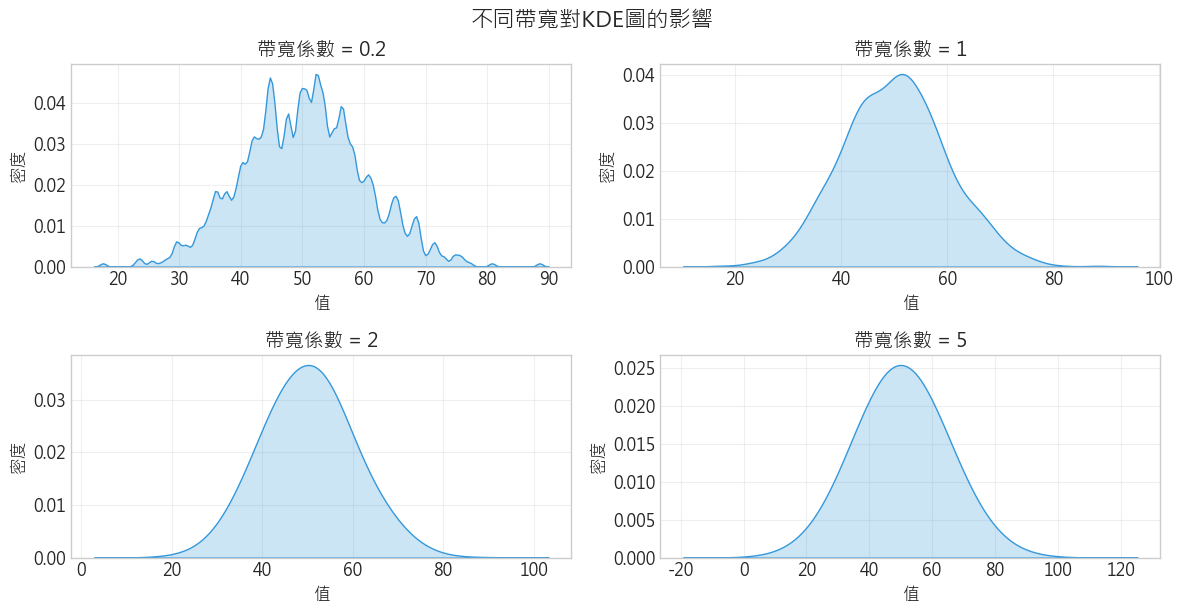

In [36]:
# 不同帶寬的KDE圖比較
plt.figure(figsize=(12, 6))

bandwidths = [0.2, 1, 2, 5]
for i, bw in enumerate(bandwidths):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data_normal, bw_adjust=bw, color='#3498db', fill=True)
    plt.title(f'帶寬係數 = {bw}', fontsize=14)
    plt.xlabel('值', fontsize=12)
    plt.ylabel('密度', fontsize=12)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('不同帶寬對KDE圖的影響', fontsize=16, y=1.02)
plt.show()

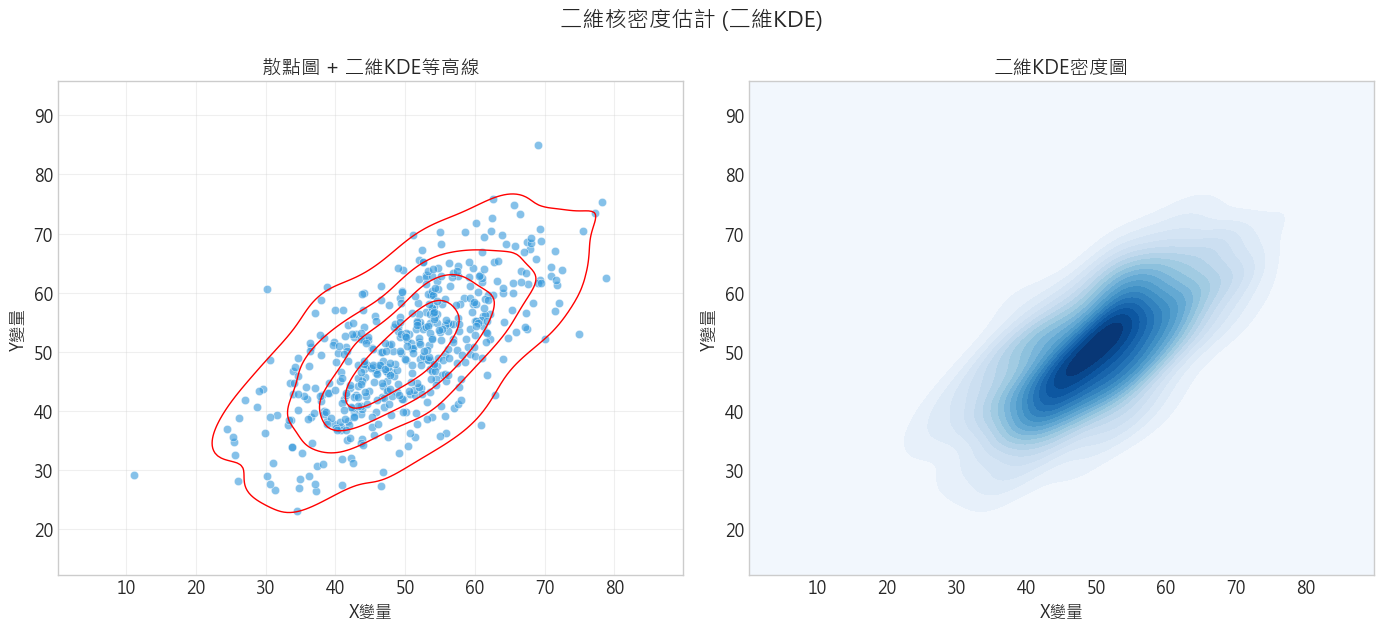

In [37]:
# 二維KDE圖 (使用雙變量數據)
# 生成相關的二維數據
mean = [50, 50]
cov = [[100, 70], [70, 100]]  # 協方差矩陣，設置一定的正相關性
x, y = np.random.multivariate_normal(mean, cov, 500).T

# 繪製二維KDE圖
plt.figure(figsize=(14, 6))

# 散點圖 + 二維KDE等高線
plt.subplot(1, 2, 1)
sns.scatterplot(x=x, y=y, color='#3498db', alpha=0.6)
sns.kdeplot(x=x, y=y, levels=5, color='red', linewidths=1)
plt.title('散點圖 + 二維KDE等高線', fontsize=14)
plt.xlabel('X變量', fontsize=12)
plt.ylabel('Y變量', fontsize=12)
plt.grid(True, alpha=0.3)

# 二維KDE密度圖
plt.subplot(1, 2, 2)
sns.kdeplot(x=x, y=y, fill=True, cmap="Blues", thresh=0, levels=20)
plt.title('二維KDE密度圖', fontsize=14)
plt.xlabel('X變量', fontsize=12)
plt.ylabel('Y變量', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('二維核密度估計 (二維KDE)', fontsize=16, y=1.05)
plt.show()


## 3. 經驗累積分布函數 (ECDF)

經驗累積分布函數(ECDF)是表示數據分布的另一種重要方式。它顯示數據中小於或等於特定值的觀測比例。ECDF的優點包括：

- 直觀展示數據集中的所有觀測值
- 不需要任何區間或平滑參數
- 便於比較不同數據集
- 易於識別中位數、四分位數等分位點

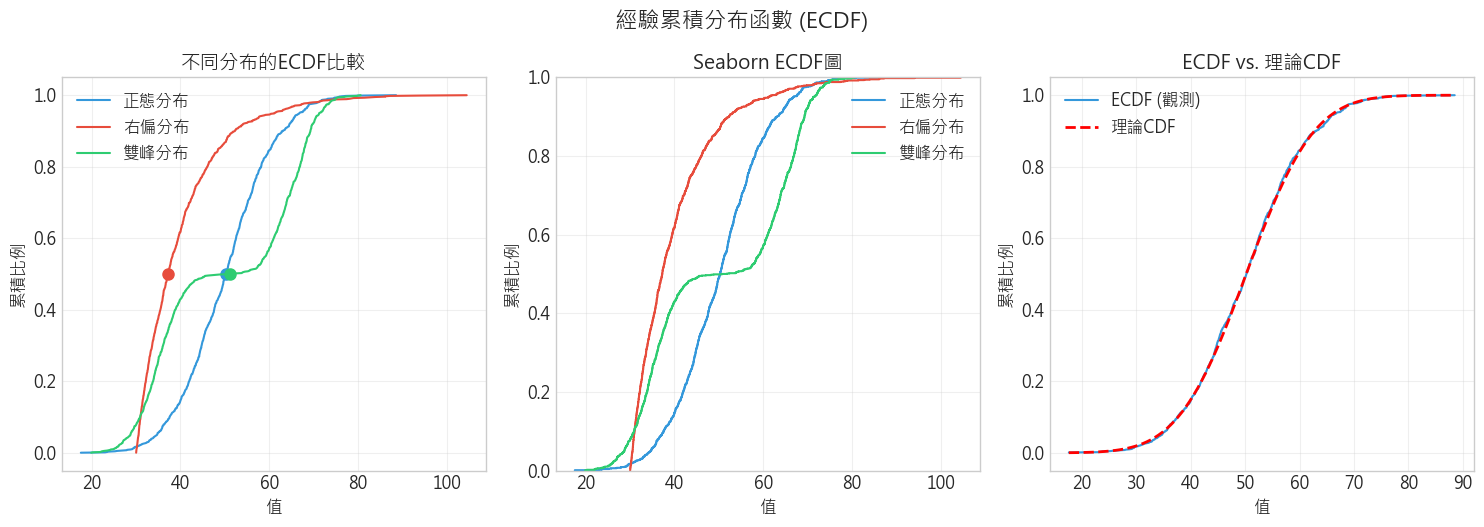

In [39]:
# 繪製基本ECDF
plt.figure(figsize=(15, 5))

def ecdf(data):
    """計算經驗累積分布函數"""
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

# 不同分布的ECDF比較
plt.subplot(1, 3, 1)
for data, name, color in zip(
    [data_normal, data_skewed, data_bimodal],
    ['正態分布', '右偏分布', '雙峰分布'],
    ['#3498db', '#e74c3c', '#2ecc71']
):
    x, y = ecdf(data)
    plt.plot(x, y, color=color, label=name)
    
    # 標記中位數位置
    median_idx = np.searchsorted(x, np.median(data))
    plt.plot(np.median(data), y[median_idx], 'o', color=color, markersize=8)

plt.title('不同分布的ECDF比較', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('累積比例', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# 使用Seaborn繪製ECDF
plt.subplot(1, 3, 2)
sns.ecdfplot(data_normal, color='#3498db', label='正態分布')
sns.ecdfplot(data_skewed, color='#e74c3c', label='右偏分布')
sns.ecdfplot(data_bimodal, color='#2ecc71', label='雙峰分布')
plt.title('Seaborn ECDF圖', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('累積比例', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# ECDF與理論累積分布函數比較
plt.subplot(1, 3, 3)
x, y = ecdf(data_normal)
plt.plot(x, y, color='#3498db', label='ECDF (觀測)')

# 添加理論累積分布函數
x_theory = np.linspace(min(data_normal), max(data_normal), 100)
y_theory = stats.norm.cdf(x_theory, data_normal.mean(), data_normal.std())
plt.plot(x_theory, y_theory, 'r--', linewidth=2, label='理論CDF')

plt.title('ECDF vs. 理論CDF', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('累積比例', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.suptitle('經驗累積分布函數 (ECDF)', fontsize=16, y=1.05)
plt.show()


## 4. 分布比較與統計檢驗

視覺比較數據分布只是第一步。為了更精確地確定數據是否符合特定分布，我們可以使用多種統計檢驗方法和圖形工具。

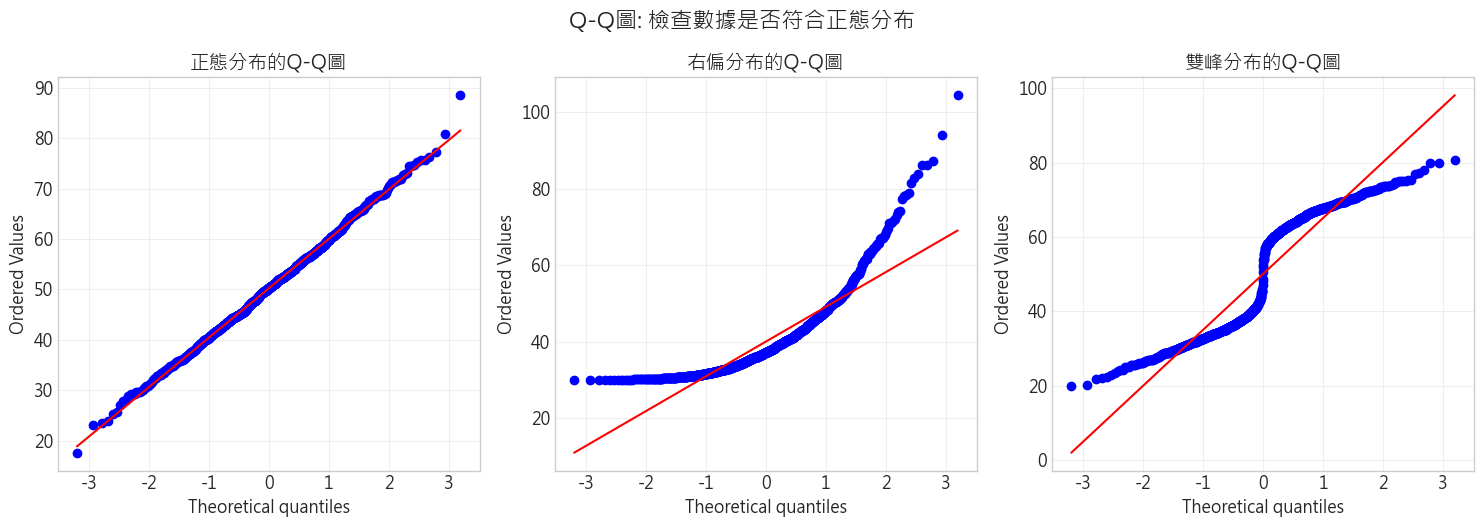

In [41]:
# Q-Q圖 (Quantile-Quantile Plot)
plt.figure(figsize=(15, 5))

# 正態分布的Q-Q圖
plt.subplot(1, 3, 1)
stats.probplot(data_normal, dist="norm", plot=plt)
plt.title('正態分布的Q-Q圖', fontsize=14)
plt.grid(True, alpha=0.3)

# 右偏分布的Q-Q圖
plt.subplot(1, 3, 2)
stats.probplot(data_skewed, dist="norm", plot=plt)
plt.title('右偏分布的Q-Q圖', fontsize=14)
plt.grid(True, alpha=0.3)

# 雙峰分布的Q-Q圖
plt.subplot(1, 3, 3)
stats.probplot(data_bimodal, dist="norm", plot=plt)
plt.title('雙峰分布的Q-Q圖', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Q-Q圖: 檢查數據是否符合正態分布', fontsize=16, y=1.05)
plt.show()

正態分布 擬合檢驗: KS統計量 = 0.1581, p值 = 0.0000
指數分布 擬合檢驗: KS統計量 = 0.0203, p值 = 0.7965
伽馬分布 擬合檢驗: KS統計量 = 0.0240, p值 = 0.6053
對數正態分布 擬合檢驗: KS統計量 = 0.0500, p值 = 0.0130


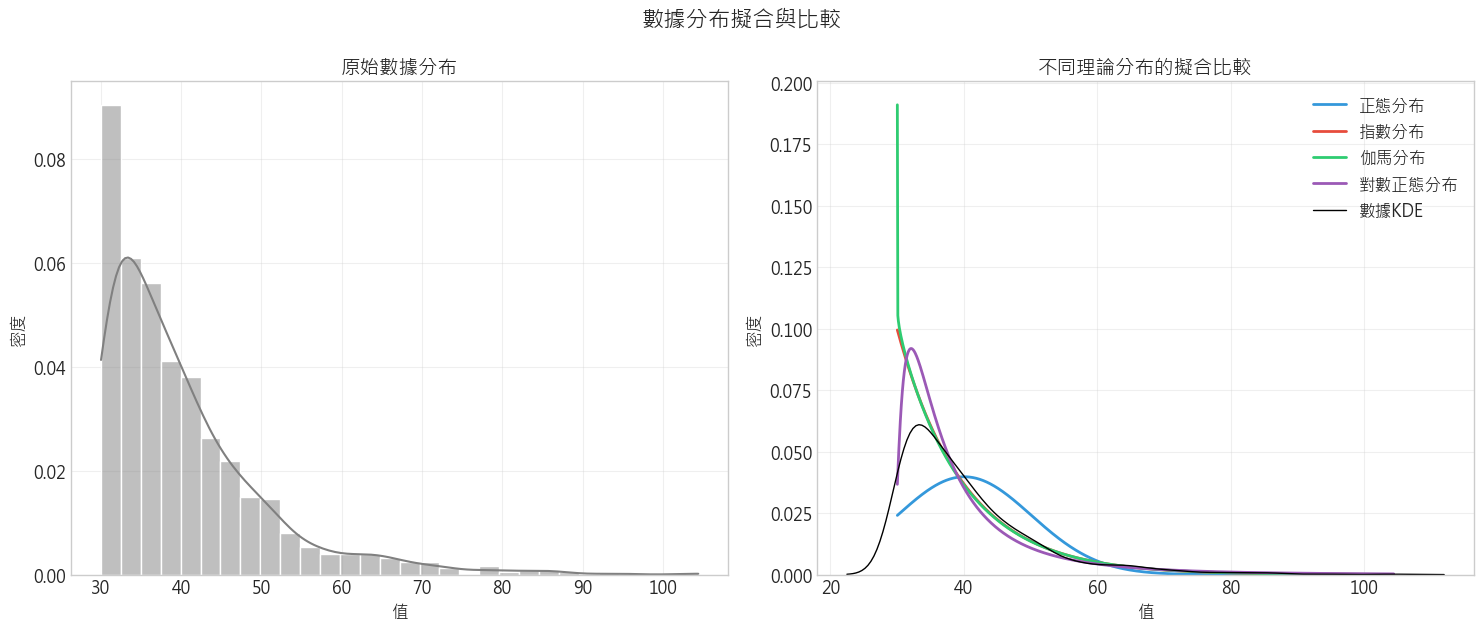

In [42]:
# 分布擬合與比較
plt.figure(figsize=(15, 6))

# 使用SciPy擬合多種分布
distributions = [
    stats.norm,
    stats.expon,
    stats.gamma,
    stats.lognorm
]

dist_names = ['正態分布', '指數分布', '伽馬分布', '對數正態分布']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

# 檢測右偏分布的數據
data = data_skewed

# 繪製數據直方圖和KDE
plt.subplot(1, 2, 1)
sns.histplot(data, bins=30, kde=True, color='gray', stat='density')
plt.title('原始數據分布', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('密度', fontsize=12)
plt.grid(True, alpha=0.3)

# 擬合多種分布並繪製
plt.subplot(1, 2, 2)
x = np.linspace(min(data), max(data), 1000)

for dist, name, color in zip(distributions, dist_names, colors):
    # 擬合分布
    params = dist.fit(data)
    
    # 計算並繪製擬合的PDF
    pdf = dist.pdf(x, *params)
    plt.plot(x, pdf, color=color, linewidth=2, label=name)
    
    # 計算擬合優度 (這裡使用KS檢驗)
    ks_stat, p_value = stats.kstest(data, dist.cdf, args=params)
    print(f"{name} 擬合檢驗: KS統計量 = {ks_stat:.4f}, p值 = {p_value:.4f}")
    
# 添加原始數據的KDE
sns.kdeplot(data, color='black', label='數據KDE', linewidth=1)

plt.title('不同理論分布的擬合比較', fontsize=14)
plt.xlabel('值', fontsize=12)
plt.ylabel('密度', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.suptitle('數據分布擬合與比較', fontsize=16, y=1.05)
plt.show()


## 5. 多變量分布可視化

理解多個變量之間的聯合分布通常是數據分析的重要任務。這裡我們介紹幾種多變量分布的可視化方法：

In [44]:
# 創建具有相關性的多變量數據
n = 1000
mu = [70, 170, 25]  # 均值
sigma = [10, 15, 5]  # 標準差

# 創建相關矩陣
corr = np.array([
    [1.0, 0.6, -0.3],
    [0.6, 1.0, -0.1],
    [-0.3, -0.1, 1.0]
])

# 從相關矩陣計算協方差矩陣
var = np.diag(np.array(sigma) ** 2)
cov = np.sqrt(var).dot(corr).dot(np.sqrt(var))

# 生成多變量正態分布數據
data_multi = np.random.multivariate_normal(mu, cov, n)

# 創建DataFrame
df = pd.DataFrame(data_multi, columns=['體重(kg)', '身高(cm)', '年齡'])

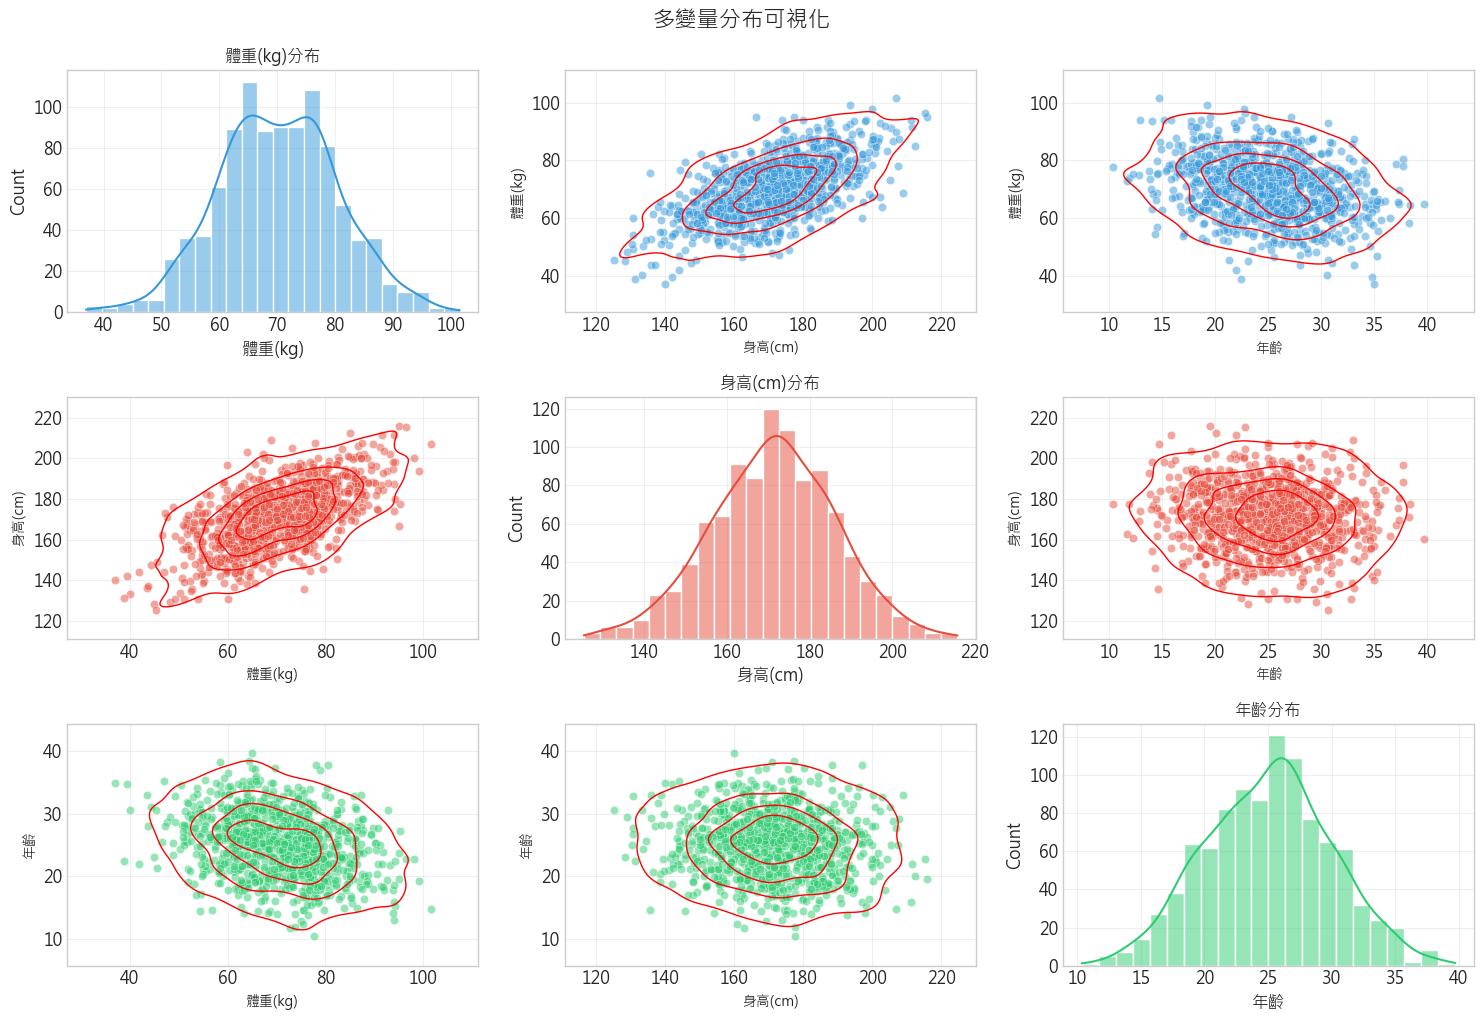

In [45]:
# 多變量分布可視化
plt.figure(figsize=(15, 10))

# 單變量直方圖和KDE（對角線元素）
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i*3+i+1)
    sns.histplot(df[col], kde=True, color=colors[i])
    plt.title(f'{col}分布', fontsize=12)
    plt.grid(True, alpha=0.3)
    
# 雙變量散點圖和KDE（非對角線元素）
plot_idx = 1
for i in range(3):
    for j in range(3):
        if i != j:  # 跳過對角線
            plt.subplot(3, 3, plot_idx)
            # 散點圖加KDE等高線
            sns.scatterplot(x=df.iloc[:, j], y=df.iloc[:, i], alpha=0.5, color=colors[i])
            sns.kdeplot(x=df.iloc[:, j], y=df.iloc[:, i], levels=5, color='red', linewidths=1)
            plt.xlabel(df.columns[j], fontsize=10)
            plt.ylabel(df.columns[i], fontsize=10)
            plt.grid(True, alpha=0.3)
        plot_idx += 1

plt.tight_layout()
plt.suptitle('多變量分布可視化', fontsize=16, y=1.02)
plt.show()

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

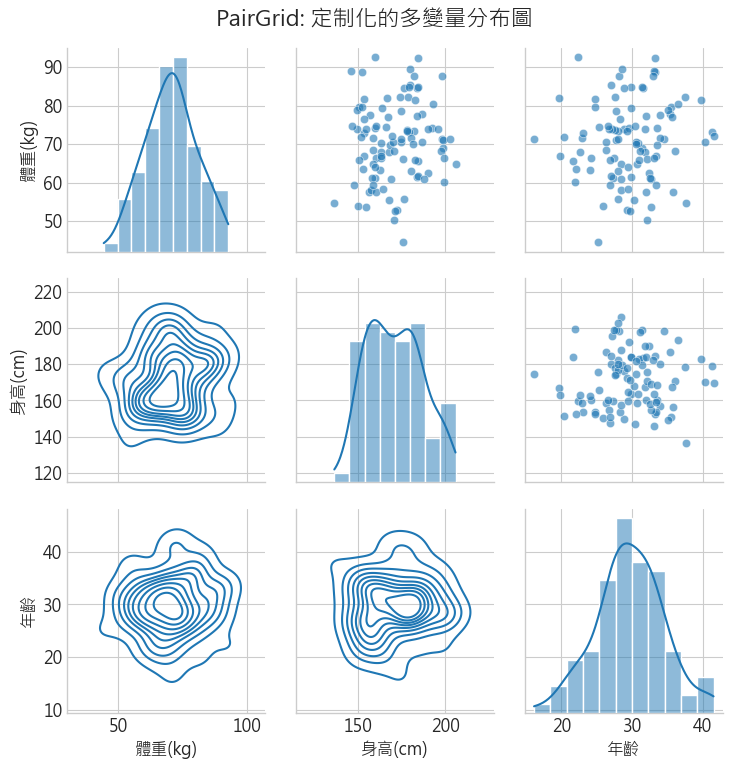

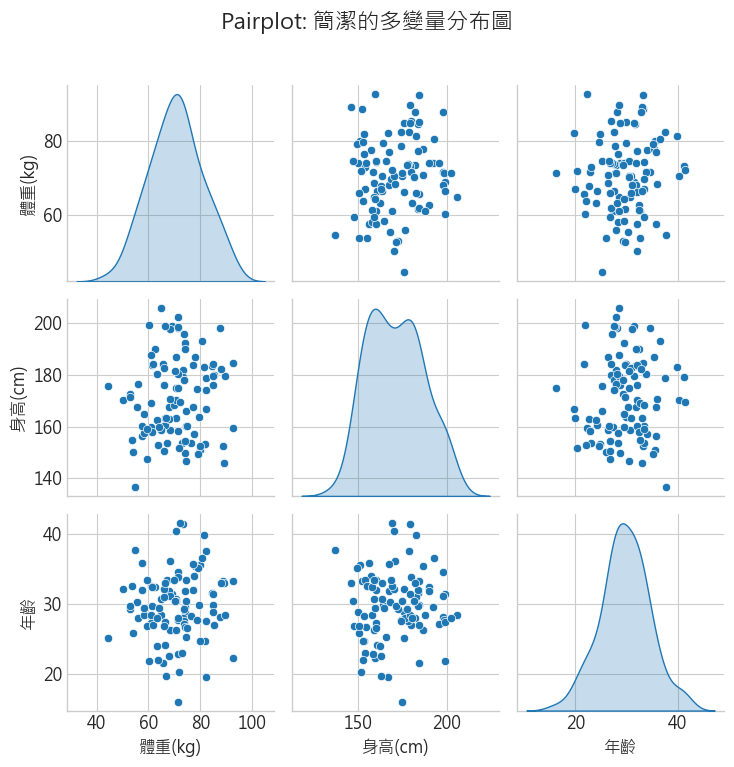

In [52]:
# 使用Seaborn的PairGrid和pairplot
plt.figure(figsize=(14, 7))

# 使用PairGrid實現更多定制
# Sample data
np.random.seed(0)
df = pd.DataFrame({
    '體重(kg)': np.random.normal(70, 10, 100),
    '身高(cm)': np.random.normal(170, 15, 100),
    '年齡': np.random.normal(30, 5, 100)
})

# 使用Seaborn的PairGrid和pairplot
plt.figure(figsize=(14, 7))

# 使用PairGrid實現更多定制
g = sns.PairGrid(df)
g.map_diag(sns.histplot, kde=True)
g.map_upper(sns.scatterplot, alpha=0.6)
g.map_lower(sns.kdeplot)
g.fig.suptitle('PairGrid: 定制化的多變量分布圖', fontsize=16, y=1.02)

# 更簡潔的pairplot方法
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot: 簡潔的多變量分布圖', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


## 6. 數據分布可視化的最佳實踐

在創建分布圖時，以下最佳實踐可以幫助你提高可視化的效果：

1. **選擇適當的圖表類型**：根據數據特性和分析目的選擇合適的分布圖
2. **提供統計摘要**：在圖表中加入均值、中位數、標準差等統計量
3. **適當的箱子寬度**：直方圖中選擇合適的箱子數量，避免過度平滑或過度噪聲
4. **比較多個分布**：使用透明度、不同顏色或重疊來有效比較多個數據集
5. **標記重要特徵**：強調分布中的關鍵點，如峰值、異常值或閾值
6. **考慮樣本大小**：小樣本數據可能需要使用更保守的視覺化方法
7. **檢查異常值**：使用箱型圖或散點圖檢查極端值
8. **結合理論分布**：將實際數據與理論分布進行對比
9. **考慮變換**：對高度偏斜的數據考慮使用對數或其他變換
10. **明確標記坐標軸**：確保坐標軸有清晰的標籤和適當的刻度


## 7. 總結

在本課程中，我們探討了多種用於展示數據分布的視覺化技術：

- **直方圖**：最基本的分布可視化工具，顯示數據的頻率分布
- **核密度估計圖**：直方圖的平滑版本，提供更連續的分布視圖
- **經驗累積分布函數**：展示數據的累積分布特徵
- **Q-Q圖**：檢查數據是否符合特定理論分布
- **分布擬合與比較**：評估數據與各種理論分布的契合度
- **多變量分布可視化**：理解多個變量之間的聯合分布

這些技術是數據分析工作流程中的關鍵工具，幫助我們理解數據特性、識別異常情況，並為後續的統計分析和模型選擇提供指導。掌握這些可視化技巧，可以大大提升你從數據中獲取洞察的能力。

數據分布的可視化不僅是描述性統計的重要組成部分，也是進行推斷統計和機器學習之前的關鍵步驟。通過本課程的學習，你已經具備了分析和解釋各類數據分布的能力，這將為你的數據分析工作奠定堅實基礎。